In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import spearmanr
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import grangercausalitytests

In [2]:
df = pd.read_csv("labeled_news_data.csv")
df.info()
df2 = pd.read_csv("ngx_stock_prices.csv")
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892 entries, 0 to 891
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   title              892 non-null    object
 1   link               892 non-null    object
 2   author             892 non-null    object
 3   date               892 non-null    object
 4   paragraphs         892 non-null    object
 5   company            892 non-null    object
 6   sector             892 non-null    object
 7   sentiment_finbert  892 non-null    object
dtypes: object(8)
memory usage: 55.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22305 entries, 0 to 22304
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Company         22305 non-null  object 
 1   Open Price      22305 non-null  float64
 2   Close Price     22305 non-null  float64
 3   High Price      22305 non-null  float64
 4   L

In [3]:
df['date'] = pd.to_datetime(df['date'])
df2['Date'] = pd.to_datetime(df2['Date'])

C:\Users\BABA\AppData\Local\Temp\ipykernel_8212\211288013.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['date'] = pd.to_datetime(df['date'])


In [4]:
df.info()
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892 entries, 0 to 891
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   title              892 non-null    object        
 1   link               892 non-null    object        
 2   author             892 non-null    object        
 3   date               892 non-null    datetime64[ns]
 4   paragraphs         892 non-null    object        
 5   company            892 non-null    object        
 6   sector             892 non-null    object        
 7   sentiment_finbert  892 non-null    object        
dtypes: datetime64[ns](1), object(7)
memory usage: 55.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22305 entries, 0 to 22304
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Company         22305 non-null  object        
 1   Open Price      

In [5]:
sentiment_mapping = {'positive': 1, 'neutral': 0, 'negative': -1}
df['news_label'] = df['sentiment_finbert'].map(sentiment_mapping)

In [6]:
df.head()

,title,link,author,date,paragraphs,company,sector,sentiment_finbert,news_label
0,Oando set to redeem promise to shareholders – ...,https://nairametrics.com/2025/02/06/oando-set-...,NM Partners,2025-02-06,oando oando shareholders receive one new ordin...,OANDO,Oil & Gas,neutral,0
1,Presco PLC reports N128 billion full-year pre-...,https://nairametrics.com/2025/02/02/presco-plc...,Izuchukwu Okoye,2025-02-02,presco plc announced full year pre tax profit ...,PRESCO,Agriculture,neutral,0
2,Conoil reports N13.806 billion pre-tax profits...,https://nairametrics.com/2025/02/02/conoil-rep...,Idika Aja,2025-02-02,image credit conoil plc conoil plc reported pr...,CONOIL,Oil & Gas,positive,1
3,Oando reports N47.7 billion pre-tax profit as ...,https://nairametrics.com/2025/01/31/oando-repo...,Izuchukwu Okoye,2025-01-31,oando plc disclosed full year pre tax profit n...,OANDO,Oil & Gas,negative,-1
4,FCMB Group reports N117.2 billion pre-tax prof...,https://nairametrics.com/2025/01/31/fcmb-group...,Izuchukwu Okoye,2025-01-31,fcmb group plc reported pre tax profit n117 2 ...,FCMB,Banking,positive,1


In [7]:
news_sentiment_daily = df.groupby(['date', 'company'])['news_label'].mean().reset_index()

In [12]:
news_sentiment_daily.head(50)

,date,company,news_label
0,2021-07-16,ETI,0.0
1,2021-08-31,FCMB,0.0
2,2021-09-17,WAPCO,-1.0
3,2021-09-18,NB,1.0
4,2021-09-18,UCAP,-1.0
5,2021-09-20,ETI,0.0
6,2021-09-23,ETI,0.0
7,2021-09-24,ETI,0.0
8,2021-09-25,UBA,0.0
9,2021-09-28,ETI,0.0


In [10]:
df2 = df2.rename(columns={'Date': 'date'})
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22305 entries, 0 to 22304
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Company         22305 non-null  object        
 1   Open Price      22305 non-null  float64       
 2   Close Price     22305 non-null  float64       
 3   High Price      22305 non-null  float64       
 4   Low Price       22305 non-null  float64       
 5   Change          22305 non-null  float64       
 6   No of Trade     22305 non-null  int64         
 7   Volume          22305 non-null  int64         
 8   Value           22305 non-null  float64       
 9   date            22305 non-null  datetime64[ns]
 10  Market Cap      22305 non-null  float64       
 11  Weight          22305 non-null  float64       
 12  Weighted Index  22305 non-null  float64       
dtypes: datetime64[ns](1), float64(9), int64(2), object(1)
memory usage: 2.2+ MB


In [11]:
df2 = df2.rename(columns={'Company': 'company'})
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22305 entries, 0 to 22304
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   company         22305 non-null  object        
 1   Open Price      22305 non-null  float64       
 2   Close Price     22305 non-null  float64       
 3   High Price      22305 non-null  float64       
 4   Low Price       22305 non-null  float64       
 5   Change          22305 non-null  float64       
 6   No of Trade     22305 non-null  int64         
 7   Volume          22305 non-null  int64         
 8   Value           22305 non-null  float64       
 9   date            22305 non-null  datetime64[ns]
 10  Market Cap      22305 non-null  float64       
 11  Weight          22305 non-null  float64       
 12  Weighted Index  22305 non-null  float64       
dtypes: datetime64[ns](1), float64(9), int64(2), object(1)
memory usage: 2.2+ MB


In [52]:
merged = pd.merge(news_sentiment_daily, df2[['date', 'company', 'Close Price']], on=['date', 'company'])

In [63]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 522 entries, 0 to 521
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         522 non-null    datetime64[ns]
 1   company      522 non-null    object        
 2   news_label   522 non-null    int32         
 3   Close Price  522 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int32(1), object(1)
memory usage: 14.4+ KB


In [33]:
merged.head(50)

,date,company,news_label,Close Price
0,2021-07-16,ETI,0.0,NaN
1,2021-08-31,FCMB,0.0,NaN
2,2021-09-17,WAPCO,-1.0,21.50
3,2021-09-18,NB,1.0,NaN
4,2021-09-18,UCAP,-1.0,NaN
5,2021-09-20,ETI,0.0,5.10
6,2021-09-23,ETI,0.0,5.15
7,2021-09-24,ETI,0.0,5.30
8,2021-09-25,UBA,0.0,NaN
9,2021-09-28,ETI,0.0,5.30


In [62]:
merged['news_label'] = merged['news_label'].astype(int)

In [59]:
correlation = merged[['news_label', 'Close Price']].corr().iloc[0,1]
print(f"Pearson Correlation between Sentiment Index and NGX-30 Index: {correlation:.4f}")
spearman_corr, _ = spearmanr(merged['news_label'], merged['Close Price'])
print("Spearman Correlation:", spearman_corr)

Pearson Correlation between Sentiment Index and NGX-30 Index: -0.1298
Spearman Correlation: -0.09815608271104208


In [64]:
pos = merged[merged['news_label'] == 1]
neg = merged[merged['news_label'] == 0]

In [55]:
pos.info()
neg.info()

<class 'pandas.core.frame.DataFrame'>
Index: 155 entries, 10 to 520
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         155 non-null    datetime64[ns]
 1   company      155 non-null    object        
 2   news_label   155 non-null    float64       
 3   Close Price  155 non-null    float64       
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 6.1+ KB
<class 'pandas.core.frame.DataFrame'>
Index: 242 entries, 1 to 516
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         242 non-null    datetime64[ns]
 1   company      242 non-null    object        
 2   news_label   242 non-null    float64       
 3   Close Price  242 non-null    float64       
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 9.5+ KB


In [65]:
pos.head()

,date,company,news_label,Close Price
10,2021-10-06,STANBIC,1,39.00
12,2021-10-08,PRESCO,1,85.00
16,2021-10-14,FBNH,1,11.75
32,2021-10-29,FBNH,1,11.05
42,2021-11-11,UBA,1,8.15


In [68]:
merged["Returns"] = merged["Close Price"].pct_change()
merged["Volatility"] = merged["Returns"].rolling(7).std()

In [69]:
merged.head()

,date,company,news_label,Close Price,Returns,Volatility
0,2021-09-17,WAPCO,-1,21.50,NaN,NaN
1,2021-09-20,ETI,0,5.10,-0.762791,NaN
2,2021-09-23,ETI,0,5.15,0.009804,NaN
3,2021-09-24,ETI,0,5.30,0.029126,NaN
4,2021-09-28,ETI,0,5.30,0.000000,NaN


In [93]:
# Check correlation
correlation = merged[["news_label", "Volatility"]].corr().iloc[0,1]
print(correlation)

0.030932051186691976


In [92]:
spearman_corr, _ = spearmanr(merged['news_label'], merged['Volatility'])
print("Spearman Correlation:", spearman_corr)

Spearman Correlation: nan


In [66]:
correlation = pos[['news_label', 'Close Price']].corr().iloc[0,1]
print(f"Pearson Correlation between Sentiment Index and NGX-30 Index: {correlation:.4f}")
spearman_corr, _ = spearmanr(pos['news_label'], pos['Close Price'])
print("Spearman Correlation:", spearman_corr)

Pearson Correlation between Sentiment Index and NGX-30 Index: nan
Spearman Correlation: nan


C:\Users\BABA\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_stats_py.py:5445: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))


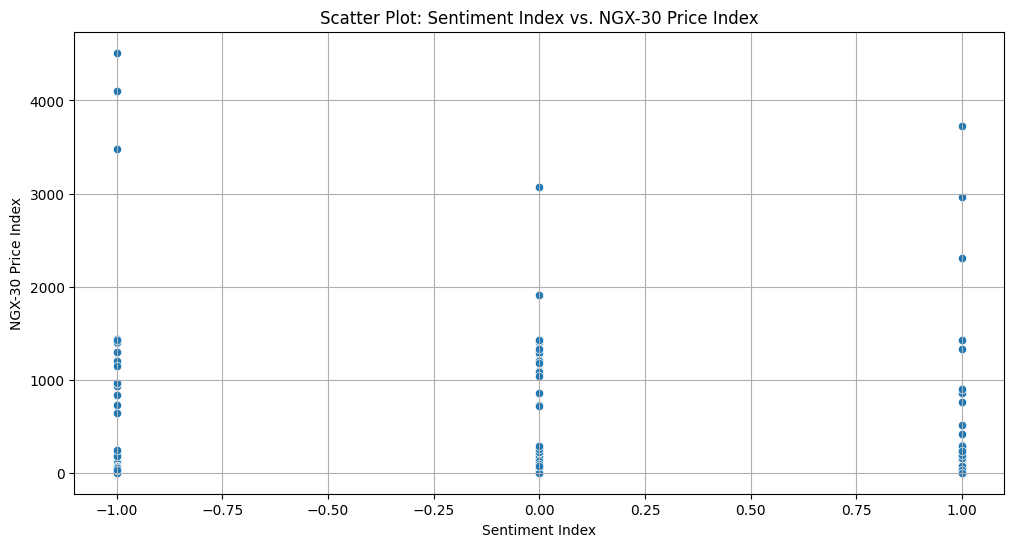

In [27]:
plt.figure(figsize=(12,6))
sns.scatterplot(x=merged['news_label'], y=merged['Close Price'])
plt.xlabel("Sentiment Index")
plt.ylabel("NGX-30 Price Index")
plt.title("Scatter Plot: Sentiment Index vs. NGX-30 Price Index")
plt.grid()
plt.show()
#plt.savefig("sentiment index vs Price Index.png")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


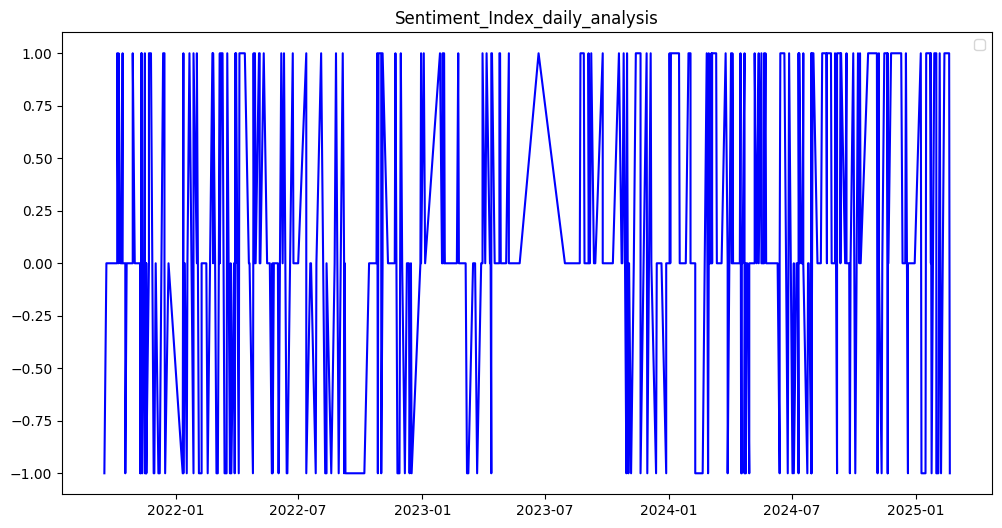

In [30]:
plt.figure(figsize=(12,6))
plt.plot(merged['date'], merged['news_label'], label="news_label", color='blue')
#plt.plot(final_data['date'], final_data['Close Price'], label="Close Price", color='red', linestyle='dashed')
#plt.xlabel("Date")
#plt.ylabel("Index Value")
plt.legend()
plt.title("Sentiment_Index_daily_analysis")
plt.show()
#plt.savefig("sentiments_analysis_chart.png")

In [34]:
merged_data = pd.merge(news_sentiment_daily, df2[['date', 'company', 'Weight']], on=['date', 'company'])

In [35]:
merged_data.head()

,date,company,news_label,Weight
0,2021-09-17,WAPCO,-1.0,2.090611e-10
1,2021-09-20,ETI,0.0,1.084808e-11
2,2021-09-23,ETI,0.0,1.095444e-11
3,2021-09-24,ETI,0.0,1.127350e-11
4,2021-09-28,ETI,0.0,1.127350e-11


In [36]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 522 entries, 0 to 521
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        522 non-null    datetime64[ns]
 1   company     522 non-null    object        
 2   news_label  522 non-null    float64       
 3   Weight      522 non-null    float64       
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 16.4+ KB


In [24]:
# Fill missing sentiment scores with previous available sentiment (forward fill)
merged_data['Weight'].fillna(method='ffill', inplace=True)

C:\Users\BABA\AppData\Local\Temp\ipykernel_14024\212749413.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  merged_data['Weight'].fillna(method='ffill', inplace=True)


In [25]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 719 entries, 0 to 718
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        719 non-null    datetime64[ns]
 1   company     719 non-null    object        
 2   news_label  719 non-null    float64       
 3   Weight      717 non-null    float64       
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 22.6+ KB


In [27]:
merged_data.head()

,date,company,news_label,Weight
0,2021-07-16,ETI,0.0,NaN
1,2021-08-31,FCMB,0.0,NaN
2,2021-09-17,WAPCO,-1.0,2.090611e-10
3,2021-09-18,NB,1.0,2.090611e-10
4,2021-09-18,UCAP,-1.0,2.090611e-10


In [28]:
merged_data.dropna(subset=['Weight'], inplace=True)

In [29]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 717 entries, 2 to 718
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        717 non-null    datetime64[ns]
 1   company     717 non-null    object        
 2   news_label  717 non-null    float64       
 3   Weight      717 non-null    float64       
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 28.0+ KB


In [37]:
merged_data['Weighted_Sentiment'] = merged_data['news_label'] * merged_data['Weight']

In [38]:
merged_data.head()

,date,company,news_label,Weight,Weighted_Sentiment
0,2021-09-17,WAPCO,-1.0,2.090611e-10,-2.090611e-10
1,2021-09-20,ETI,0.0,1.084808e-11,0.000000e+00
2,2021-09-23,ETI,0.0,1.095444e-11,0.000000e+00
3,2021-09-24,ETI,0.0,1.127350e-11,0.000000e+00
4,2021-09-28,ETI,0.0,1.127350e-11,0.000000e+00


In [39]:
sentiment_index = merged_data.groupby('date')['Weighted_Sentiment'].sum().reset_index()
sentiment_index.rename(columns={'Weighted_Sentiment': 'Sentiment_Index'}, inplace=True)

In [35]:
sentiment_index.head()

,date,Sentiment_Index
0,2021-09-17,-2.090611e-10
1,2021-09-18,0.000000e+00
2,2021-09-20,0.000000e+00
3,2021-09-23,0.000000e+00
4,2021-09-24,0.000000e+00


In [40]:
# Normalize between -1 and +1 (Optional: If needed)
sentiment_index['Sentiment_Index'] = sentiment_index['Sentiment_Index'].clip(-1, 1)

In [41]:
sentiment_index.head()

,date,Sentiment_Index
0,2021-09-17,-2.090611e-10
1,2021-09-20,0.000000e+00
2,2021-09-23,0.000000e+00
3,2021-09-24,0.000000e+00
4,2021-09-28,0.000000e+00


In [42]:
dff2 = df2[['date', 'Close Price']].drop_duplicates()  # Keep only the daily NGX-30 index
final_data = pd.merge(sentiment_index, dff2, on='date')

In [50]:
final_data.head(50)

,date,Sentiment_Index,Close Price
0,2021-09-17,-2.090611e-10,715.00
1,2021-09-17,-2.090611e-10,68.00
2,2021-09-17,-2.090611e-10,22.35
3,2021-09-17,-2.090611e-10,245.00
4,2021-09-17,-2.090611e-10,17.20
5,2021-09-17,-2.090611e-10,5.05
6,2021-09-17,-2.090611e-10,7.50
7,2021-09-17,-2.090611e-10,2.97
8,2021-09-17,-2.090611e-10,2.43
9,2021-09-17,-2.090611e-10,28.00


In [44]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8531 entries, 0 to 8530
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   date             8531 non-null   datetime64[ns]
 1   Sentiment_Index  8531 non-null   float64       
 2   Close Price      8531 non-null   float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 200.1 KB


In [41]:
final_data.dropna(subset=['Close Price'], inplace=True)

In [42]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8548 entries, 0 to 8698
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   date             8548 non-null   datetime64[ns]
 1   Sentiment_Index  8548 non-null   float64       
 2   Close Price      8548 non-null   float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 267.1 KB


Pearson Correlation between Sentiment Index and NGX-30 Index: -0.0262


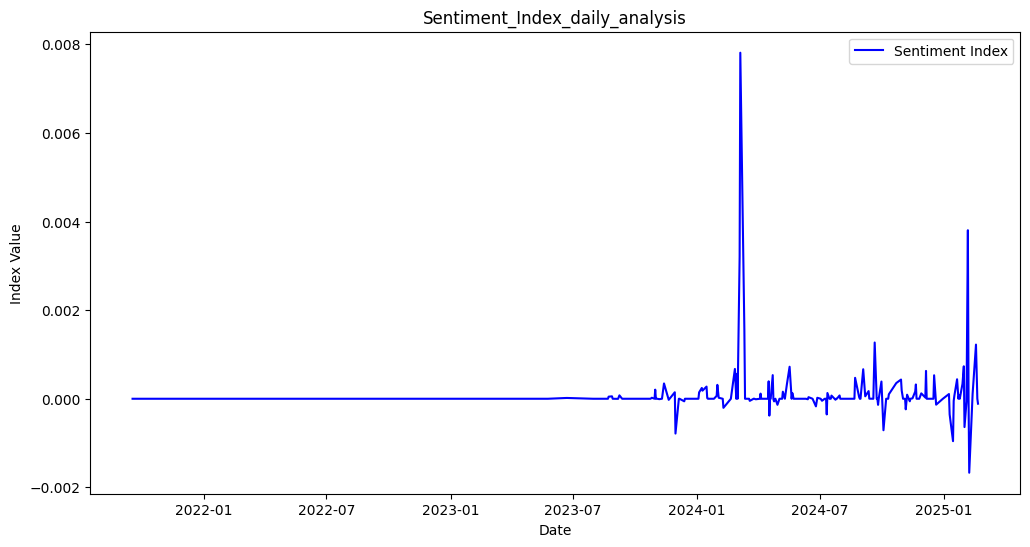

In [46]:
correlation = final_data[['Sentiment_Index', 'Close Price']].corr().iloc[0,1]
print(f"Pearson Correlation between Sentiment Index and NGX-30 Index: {correlation:.4f}")

# === STEP 7: Plot Time Series ===
plt.figure(figsize=(12,6))
plt.plot(final_data['date'], final_data['Sentiment_Index'], label="Sentiment Index", color='blue')
#plt.plot(final_data['date'], final_data['Close Price'], label="Close Price", color='red', linestyle='dashed')
plt.xlabel("Date")
plt.ylabel("Index Value")
plt.legend()
plt.title("Sentiment_Index_daily_analysis")
plt.show()
#plt.savefig("sentiments_analysis_chart.png")

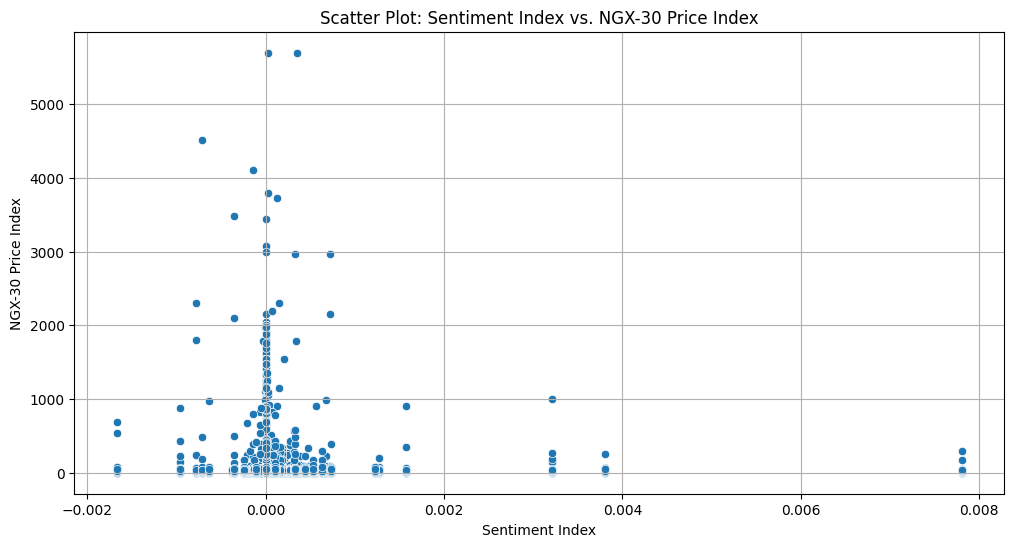

In [47]:
import seaborn as sns

plt.figure(figsize=(12,6))
sns.scatterplot(x=final_data['Sentiment_Index'], y=final_data['Close Price'])
plt.xlabel("Sentiment Index")
plt.ylabel("NGX-30 Price Index")
plt.title("Scatter Plot: Sentiment Index vs. NGX-30 Price Index")
plt.grid()
plt.show()
#plt.savefig("sentiment index vs Price Index.png")

In [51]:
spearman_corr, _ = spearmanr(final_data['Sentiment_Index'], final_data['Close Price'])
print("Spearman Correlation:", spearman_corr)

Spearman Correlation: 0.004440407302470608


In [87]:
final_data["Returns"] = final_data["Close Price"].pct_change()
final_data["Volatility"] = final_data["Returns"].rolling(7).std()

In [88]:
final_data.head()

,date,Sentiment_Index,Close Price,Returns,Volatility
0,2021-09-17,-2.090611e-10,715.00,NaN,NaN
1,2021-09-17,-2.090611e-10,68.00,-0.904895,NaN
2,2021-09-17,-2.090611e-10,22.35,-0.671324,NaN
3,2021-09-17,-2.090611e-10,245.00,9.961969,NaN
4,2021-09-17,-2.090611e-10,17.20,-0.929796,NaN


In [89]:
# Check correlation
correlation = final_data[["Sentiment_Index", "Volatility"]].corr().iloc[0,1]
print(correlation)

-0.006875782925823026


In [90]:
spearman_corr, _ = spearmanr(final_data['Sentiment_Index'], final_data['Volatility'])
print("Spearman Correlation:", spearman_corr)

Spearman Correlation: nan


In [52]:
from statsmodels.tsa.stattools import adfuller

# Function to test stationarity
def check_stationarity(series, name):
    result = adfuller(series.dropna())
    print(f"{name} - ADF Test p-value:", result[1])

# Check for sentiment index and stock price
check_stationarity(final_data['Sentiment_Index'], "Sentiment Index")
check_stationarity(final_data['Close Price'], "Close Price")

Sentiment Index - ADF Test p-value: 1.8630376453111478e-17
Close Price - ADF Test p-value: 3.139380736514303e-13


In [53]:
# Prepare data for Granger test
granger_df = final_data[['Sentiment_Index', 'Close Price']].dropna()

# Perform Granger causality test for lags = 1 to 5
grangercausalitytests(granger_df, maxlag=5, verbose=True)

C:\Users\BABA\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(



Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1084  , p=0.7420  , df_denom=8544, df_num=1
ssr based chi2 test:   chi2=0.1084  , p=0.7419  , df=1
likelihood ratio test: chi2=0.1084  , p=0.7419  , df=1
parameter F test:         F=0.1084  , p=0.7420  , df_denom=8544, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.1170  , p=0.8896  , df_denom=8541, df_num=2
ssr based chi2 test:   chi2=0.2340  , p=0.8896  , df=2
likelihood ratio test: chi2=0.2340  , p=0.8896  , df=2
parameter F test:         F=0.1170  , p=0.8896  , df_denom=8541, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.1223  , p=0.9470  , df_denom=8538, df_num=3
ssr based chi2 test:   chi2=0.3671  , p=0.9470  , df=3
likelihood ratio test: chi2=0.3671  , p=0.9470  , df=3
parameter F test:         F=0.1223  , p=0.9470  , df_denom=8538, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=0.1328  , p=0.

{1: ({'ssr_ftest': (0.10841148537470688, 0.7419680060492242, 8544.0, 1),
   'ssr_chi2test': (0.10844955120524574, 0.7419162512021262, 1),
   'lrtest': (0.1084488631458953, 0.7419170407406588, 1),
   'params_ftest': (0.10841148536177048, 0.7419680060644658, 8544.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (0.11695240945841001, 0.8896289546689641, 8541.0, 2),
   'ssr_chi2test': (0.234041749498085, 0.8895666234895715, 2),
   'lrtest': (0.23403854481875896, 0.8895680488785971, 2),
   'params_ftest': (0.11695241508953419, 0.8896289496600522, 8541.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (0.122252582836028, 0.9470178883462091, 8538.0, 3),
   'ssr_chi2test': (0.3670584400329793, 0.9469601400118131, 3),
   'lrtest': (0.3670505565532949, 0.9469617259579098, 3),
   'params_ftest': (0.12225258862303578, 0.9470178848545299, 8538.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
          [0

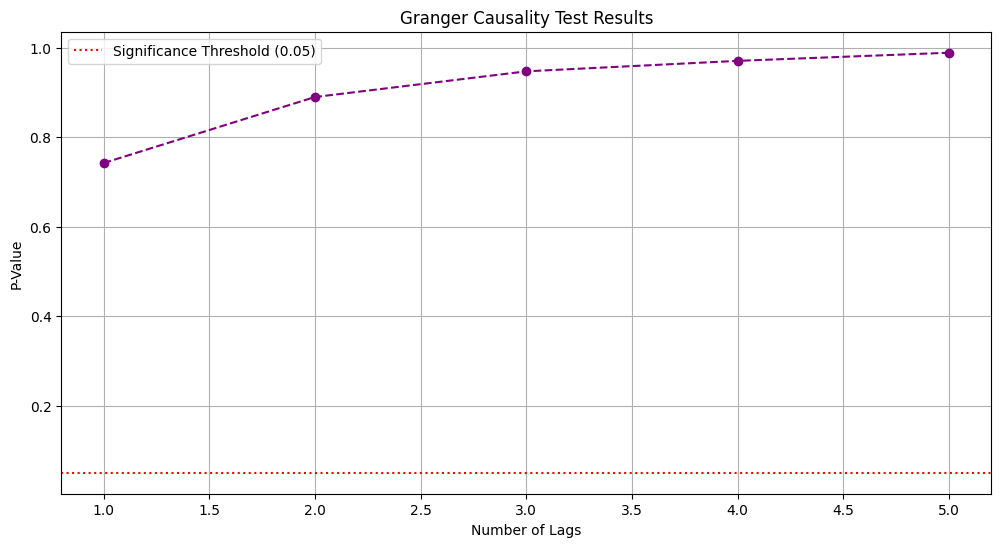

<Figure size 640x480 with 0 Axes>

In [62]:
lags = [1, 2, 3, 4, 5]
p_values = [0.7420, 0.8896, 0.9470, 0.9704, 0.9886]  # Replace with actual p-values from Granger test

plt.figure(figsize=(12,6))
plt.plot(lags, p_values, marker='o', linestyle='--', color='purple')
plt.axhline(y=0.05, color='red', linestyle='dotted', label='Significance Threshold (0.05)')
plt.xlabel("Number of Lags")
plt.ylabel("P-Value")
plt.title("Granger Causality Test Results")
plt.legend()
plt.grid()
plt.show()
plt.savefig("Granger_Cansuality_Test_chart.png")